In [1]:
import pandas as pd
import altair as alt
import os

In [4]:
room_ids = set([x.split("_")[0] for x in os.listdir("data-bms")])
room_ids = list(filter(lambda x: "." not in x, room_ids))
room_ids

['52', '520', '522', '524']

In [8]:
room_df = pd.concat([get_room_df(room) for room in room_ids])
room_df

,time,valve,temp_act,temp_target,presence,room_id
0,2022-12-23 14:00:00+00:00,20.0,22.9,23.0,30.0,52
1,2022-12-23 15:00:00+00:00,20.0,22.7,23.0,30.0,52
2,2022-12-23 16:00:00+00:00,20.0,22.7,23.0,30.0,52
3,2022-12-23 17:00:00+00:00,17.0,22.3,21.0,0.0,52
4,2022-12-23 18:00:00+00:00,20.0,22.2,23.0,8.0,52
...,...,...,...,...,...,...
266,2023-01-03 16:00:00+00:00,18.0,21.7,21.0,0.0,524
267,2023-01-03 17:00:00+00:00,18.0,21.1,21.0,0.0,524
268,2023-01-03 18:00:00+00:00,18.0,21.3,21.0,0.0,524
269,2023-01-03 19:00:00+00:00,20.0,20.9,21.0,0.0,524


In [21]:
weather_df = pd.read_csv("data-bms/weather.csv")
room_df.time = pd.to_datetime(room_df.time).dt.strftime('%Y-%m-%d %H:%M:%S')
weather_df.time = pd.to_datetime(weather_df.time).dt.strftime('%Y-%m-%d %H:%M:%S')


In [66]:
df = pd.merge(room_df, weather_df, on="time")
lst = []


,time,valve,temp_act,temp_target,presence,room_id,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,next_hour_temp,temp_delta
0,2022-12-23 14:00:00,20.0,22.9,23.0,30.0,52,7.4,5.6,88.0,0.0,NaN,230.0,14.0,NaN,1010.2,NaN,3.0,22.7,-0.2
1,2022-12-23 14:00:00,20.0,20.1,23.0,30.0,522,7.4,5.6,88.0,0.0,NaN,230.0,14.0,NaN,1010.2,NaN,3.0,20.2,0.1
2,2022-12-23 14:00:00,20.0,21.0,21.0,0.0,524,7.4,5.6,88.0,0.0,NaN,230.0,14.0,NaN,1010.2,NaN,3.0,21.2,0.2
3,2022-12-23 15:00:00,20.0,22.7,23.0,30.0,52,7.1,5.6,90.0,0.0,NaN,226.0,13.3,NaN,1010.2,NaN,3.0,22.7,0.0
4,2022-12-23 15:00:00,20.0,20.4,21.0,0.0,520,7.1,5.6,90.0,0.0,NaN,226.0,13.3,NaN,1010.2,NaN,3.0,20.7,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2023-01-03 18:00:00,18.0,21.3,21.0,0.0,524,6.7,5.7,93.0,0.0,NaN,280.0,15.1,NaN,1028.1,NaN,3.0,20.9,-0.4
1075,2023-01-03 19:00:00,18.0,22.5,21.0,0.0,52,6.5,5.5,93.0,0.0,NaN,284.0,15.5,NaN,1028.5,NaN,3.0,22.2,-0.3
1076,2023-01-03 19:00:00,18.0,21.3,21.0,0.0,520,6.5,5.5,93.0,0.0,NaN,284.0,15.5,NaN,1028.5,NaN,3.0,21.0,-0.3
1077,2023-01-03 19:00:00,20.0,21.0,21.0,0.0,522,6.5,5.5,93.0,0.0,NaN,284.0,15.5,NaN,1028.5,NaN,3.0,20.7,-0.3


In [69]:
for v in [17, 18, 20]:
    p1 = res[res.valve == v]
    p1["diff"] = p1.temp_target - p1.temp_act
    print(v, p1["diff"].mean())

17 -0.5164473684210528
18 -0.4375000000000003
20 0.8634317862165964


/var/folders/fz/vff1xm2n6d3_nqh_0k228r9h0000gp/T/ipykernel_3349/345765058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1["diff"] = p1.temp_target - p1.temp_act
/var/folders/fz/vff1xm2n6d3_nqh_0k228r9h0000gp/T/ipykernel_3349/345765058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1["diff"] = p1.temp_target - p1.temp_act
/var/folders/fz/vff1xm2n6d3_nqh_0k228r9h0000gp/T/ipykernel_3349/345765058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [70]:
for v in [17, 18, 20]:
    p1 = res[res.valve == v]
    print(v, p1["temp_delta"].mean())

17 -0.06842105263157904
18 -0.08935185185185206
20 0.04261603375527434


In [57]:
res[res.temp_act != res.next_hour_temp]

,time,valve,temp_act,temp_target,presence,room_id,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,next_hour_temp


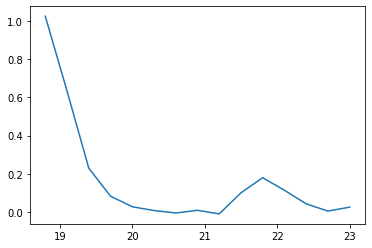

In [79]:
import matplotlib.pyplot as plt
import numpy as np
v = 20

p1 = res[res.valve == v]
# print(v, p1["temp_delta"].mean())
x = np.linspace(p1["temp_act"].min(), p1["temp_act"].max(), 15)
y = list(map(lambda temp: valve_effectiveness(p1, v, temp), x))
plt.plot(x, y)
plt.show()

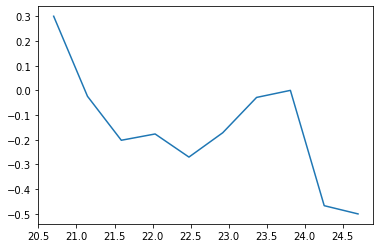

In [87]:
v = 18

p1 = res[res.valve == v]
# print(v, p1["temp_delta"].mean())
x = np.linspace(p1["temp_act"].min(), p1["temp_act"].max(), 10)
y = list(map(lambda temp: valve_effectiveness(p1, v, temp), x))
plt.plot(x, y)
plt.show()

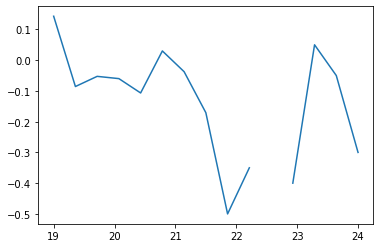

In [84]:
v = 17

p1 = res[res.valve == v]
# print(v, p1["temp_delta"].mean())
x = np.linspace(p1["temp_act"].min(), p1["temp_act"].max(), 15)
y = list(map(lambda temp: valve_effectiveness(p1, v, temp), x))
plt.plot(x, y)
plt.show()

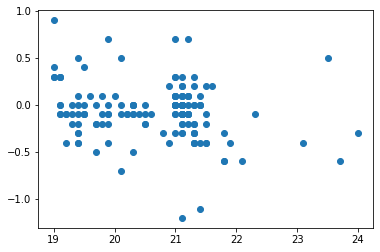

In [74]:
p1 = res[res.valve == 17]
# print(v, p1["temp_delta"].mean())
plt.scatter(p1["temp_act"], p1["temp_delta"])
plt.show()

In [92]:
from utils import get_cop
get_cop(-7)

2.8510999999999997

In [10]:
from data_process import get_all_rooms
from util import valve_effectiveness
df = get_all_rooms("data-bms")
valve_effectiveness(df, 20, 18.8)

1.0249999999999995

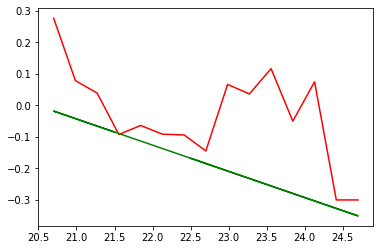

In [3]:
from util import get_cop, get_temp, valve_effectiveness, valve_multiplier
from valve_estimation import valve_line
from data_process import get_all_rooms
import matplotlib.pyplot as plt
import numpy as np
bms_data = get_all_rooms("data-bms")
v18 = bms_data[bms_data["valve"] == 18]
x = np.linspace(v18["temp_act"].min(), v18["temp_act"].max(), 15)
y = list(map(lambda temp: valve_effectiveness(v18, 18, temp), x))
# p3 = np.poly1d(np.polyfit(x, y, 1))
# plt.scatter(v18["temp_act"], v18["temp_delta"])
plt.plot(x, y, "r")
plt.plot(v18["temp_act"], valve_line(bms_data)[18](v18["temp_act"]), "g")
plt.show()


In [4]:
valve_line(bms_data)[18]([17, 18, 19, 20])

array([0.2897322 , 0.20656089, 0.12338958, 0.04021827])

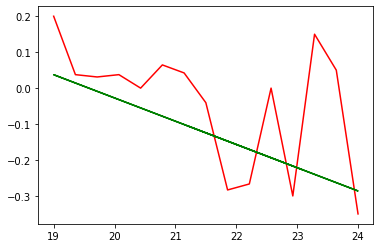

In [3]:
from util import get_cop, get_temp, valve_effectiveness, valve_multiplier
from valve_estimation import valve_line
from data_process import get_all_rooms
import matplotlib.pyplot as plt
import numpy as np
bms_data = get_all_rooms("data-bms")
v18 = bms_data[bms_data["valve"] == 17]
x = np.linspace(v18["temp_act"].min(), v18["temp_act"].max(), 15)
y = list(map(lambda temp: valve_effectiveness(v18, 17, temp), x))
# p3 = np.poly1d(np.polyfit(x, y, 1))
# plt.scatter(v18["temp_act"], v18["temp_delta"])
plt.plot(x, y, "r")
plt.plot(v18["temp_act"], valve_line(bms_data)[17](v18["temp_act"]), "g")
plt.show()


In [8]:
valve_line(bms_data)[17]([17, 18, 19, 20])

array([ 0.16674841,  0.1020502 ,  0.037352  , -0.02734621])

 
-0.04821 x + 1.037


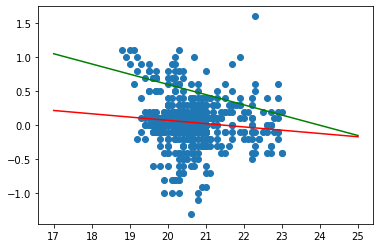

In [4]:
from util import get_cop, get_temp, valve_effectiveness, valve_multiplier
from valve_estimation import valve_line
from data_process import get_all_rooms
import matplotlib.pyplot as plt
import numpy as np
bms_data = get_all_rooms("data-bms")
v18 = bms_data[bms_data["valve"] == 20]
# x = np.linspace(v18["temp_act"].min(), v18["temp_act"].max(), 50)
# y = list(map(lambda temp: valve_effectiveness(v18, 20, temp), x))
# p3 = np.poly1d(np.polyfit(x, y, 1))
# plt.scatter(v18["temp_act"], v18["temp_delta"])
plt.scatter(v18["temp_act"], v18["temp_delta"])
line = np.poly1d(np.polyfit(v18["temp_act"], v18["temp_delta"], 1))
print(line)
line2 = np.poly1d([-0.15, 3.6])
x = np.linspace(17, 25, 20)
plt.plot(x, line(x), "r")
plt.plot(x, line2(x), "g")
# plt.plot(x, valve_line(bms_data)[20](x), "g")
plt.show()


In [3]:
print(valve_line(bms_data)[17]([17, 18, 19, 20, 21, 22]))
print(valve_line(bms_data)[18]([17, 18, 19, 20, 21, 22]))
print(valve_line(bms_data)[20]([17, 18, 19, 20, 21, 22]))

[ 0.16674841  0.1020502   0.037352   -0.02734621 -0.09204441 -0.15674261]
[ 0.2897322   0.20656089  0.12338958  0.04021827 -0.04295304 -0.12612435]
[0.91 0.74 0.57 0.4  0.23 0.06]


In [7]:
v18 = bms_data[bms_data["valve"] == 20]
v18[v18["temp_act"] < 19]

,time,valve,temp_act,temp_target,presence,room_id,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,next_hour_temp,temp_delta
155,2022-12-25 05:00:00,20.0,18.8,19.0,0.0,522,6.0,5.6,97.0,0.0,NaN,284.0,16.6,NaN,1020.0,NaN,3.0,19.9,1.1
339,2022-12-27 03:00:00,20.0,18.9,21.0,0.0,522,8.0,6.6,91.0,0.0,NaN,263.0,13.7,NaN,1015.8,NaN,3.0,19.9,1.0
